<center><h1><strong>Telco Churn Analysis</strong></h1></center>

### **Importing Libraries :**

In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sys
import os

-  Adding src package path to avoid some errors

In [79]:
src_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
if src_path not in sys.path:
    sys.path.append(src_path)

### **Some Styles** :

In [80]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

plt.style.use("seaborn-v0_8")

### **Remove Warning :**

In [30]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### **Importing custom modules :**

In [31]:
from exploration.DataIngestion import DataIngestorFactory
from exploration.DataInspection import (DataInspector, DataTypesInspectionStrategy, DescriptiveStatsInspectionStrategy, DataShapeInspectionStrategy,
                             UniqueValuesInspectionStrategy, MissingValueInspectionStrategy, DuplicateRowInspectionStrategy, SkewnessInspectionStrategy)

### **Let's start read and explore our data :**

In [32]:
data_path = "../../data/Telco-Customer-Churn.csv"
_, file_extension = os.path.splitext(data_path)

<!-- -->


> **Let's start see the interpretation of each feature :**

> - **`Churn Column (Target Variable)`**:
> - **`Churn`**: Indicates whether the customer left the company or remained. `Yes` = churned, `No` = stayed.

> - **`Services Information`**:
> - **`PhoneService`**: Does the customer have a phone service? (`Yes`/`No`)
> - **`MultipleLines`**: Does the customer have multiple lines? (`Yes`, `No`, or `No phone service`)
> - **`InternetService`**: Type of internet service (`DSL`, `Fiber optic`, or `No`)
> - **`OnlineSecurity`**: Does the customer have online security? (`Yes`, `No`, or `No internet service`)
> - **`OnlineBackup`**: Does the customer have online backup? (`Yes`, `No`, or `No internet service`)
> - **`DeviceProtection`**: Does the customer have device protection? (`Yes`, `No`, or `No internet service`)
> - **`TechSupport`**: Does the customer have tech support? (`Yes`, `No`, or `No internet service`)
> - **`StreamingTV`**: Does the customer have streaming TV service? (`Yes`, `No`, or `No internet service`)
> - **`StreamingMovies`**: Does the customer have streaming movies service? (`Yes`, `No`, or `No internet service`)

> - **`Customer Account Information`**:
> - **`tenure`**: Number of months the customer has been with the company
> - **`Contract`**: Contract type (`Month-to-month`, `One year`, `Two year`)
> - **`PaperlessBilling`**: Does the customer use paperless billing? (`Yes`/`No`)
> - **`PaymentMethod`**: Payment method used by the customer (e.g. `Electronic check`, `Mailed check`, `Bank transfer`, `Credit card`)
> - **`MonthlyCharges`**: The amount charged to the customer each month
> - **`TotalCharges`**: The total amount charged to the customer over time


> - **`Demographic Information`**:
> - **`customerID`**: Unique ID assigned to each customer
> - **`gender`**: Customer’s gender (`Male`/`Female`)
> - **`SeniorCitizen`**: Whether the customer is a senior citizen (`1` = Yes, `0` = No)
> - **`Partner`**: Does the customer have a partner? (`Yes`/`No`)
> - **`Dependents`**: Does the customer have dependents (children or others)? (`Yes`/`No`)




<!-- -->


In [60]:
data_ingestor = DataIngestorFactory.get_data_ingestor(file_extension)
df = data_ingestor.ingest(data_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### **Data Shapes :**

In [61]:
inspector = DataInspector(DataShapeInspectionStrategy())
inspector.execute_strategy(df)


Number of rows (observations): 7043

Number of columns (features): 21


#### **Data Types :**

In [62]:
inspector.set_strategy(DataTypesInspectionStrategy())
inspector.execute_strategy(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperless

> **Some insights :**
> - **`CustomerID`** column won't be usefull, will be **dropped**.
> - **`Seniorcitizen`** column its type is int , must be converted into **object**.
> - **`TotalCharges`** column its type is object , must be converted into **int**.
> - **`No Null values `**  here.



#### **Descriptive Statistics :**

In [63]:
inspector.set_strategy(DescriptiveStatsInspectionStrategy())
inspector.execute_strategy(df)


Descriptive Statistics (Numerical Features):
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

Descriptive Statistics (Categorical Features):
        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count    

> **Insights from Descriptive Statistics :**
>  >- **`SeniorCitizen`** has a **mean of 0.162** indicating **16.2%** of the customers are **Senior Citizens**.
>  >- **`tenure`** with a **mean of 32.37 months (~2.5 years)**, indicating that on average, customers have been with the company for around **2.5 years**. The **standard deviation of 24.56** shows **significant spread in duration**, meaning some customers are **new (0 months)** while others have been with the company for up to **72 months (6 years)**.
> >- **`MonthlyCharges`** has a **mean of 64.76**, with values ranging from **18.25 to 118.75** and a **standard deviation of 30.09**, indicating **significant variability**. This suggests a **positive skew**, where most customers pay **lower charges**, and fewer customers pay **higher amounts**, likely due to a mix of **basic and premium plans**.

#### **Check Missing Values :**

In [64]:
inspector.set_strategy(MissingValueInspectionStrategy())
inspector.execute_strategy(df)

Number of missing values = 0


#### **Check No. of Duplicated Rows :**

In [65]:
inspector.set_strategy(DuplicateRowInspectionStrategy())
inspector.execute_strategy(df)

nNumber of Duplicate Rows: 0


#### **let's see unique values in each column and no. of them :**

In [66]:
inspector.set_strategy(UniqueValuesInspectionStrategy())
inspector.execute_strategy(df)


Unique Values and Their Counts:

Column: customerID
Number of unique values: 7043

Column: gender
Number of unique values: 2
Unique Values: ['Female' 'Male']

Column: SeniorCitizen
Number of unique values: 2
Unique Values: [0 1]

Column: Partner
Number of unique values: 2
Unique Values: ['Yes' 'No']

Column: Dependents
Number of unique values: 2
Unique Values: ['No' 'Yes']

Column: tenure
Number of unique values: 73

Column: PhoneService
Number of unique values: 2
Unique Values: ['No' 'Yes']

Column: MultipleLines
Number of unique values: 3
Unique Values: ['No phone service' 'No' 'Yes']

Column: InternetService
Number of unique values: 3
Unique Values: ['DSL' 'Fiber optic' 'No']

Column: OnlineSecurity
Number of unique values: 3
Unique Values: ['No' 'Yes' 'No internet service']

Column: OnlineBackup
Number of unique values: 3
Unique Values: ['Yes' 'No' 'No internet service']

Column: DeviceProtection
Number of unique values: 3
Unique Values: ['No' 'Yes' 'No internet service']

Column:

#### **Skewness :**

In [67]:
inspector.set_strategy(SkewnessInspectionStrategy())
inspector.execute_strategy(df)


Skewness of Numerical Columns:

Skewness Values:
SeniorCitizen     1.833242
tenure            0.239489
MonthlyCharges   -0.220477
dtype: float64

Highly Positive Skewed Columns (Skewness > 1):
Column: SeniorCitizen, Skewness: 1.8332421986079817


> - **`SeniorCitizen`** will be treated as an object (categorical) feature, the skewness would no longer apply in the same sense

<!-- -->


<!-- -->


### **Let's dive deeper and explore more with visualization** :
> - ##### **First let's `split the data` into train and test sets first to avoid `catching patterns` from the test set and avoid `data leakage`** :

In [68]:
from sklearn.model_selection import train_test_split

df_copy = df.copy()
x = df_copy.drop(['Churn'],axis=1)
y = df_copy[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

#### **Check new shapes :**

In [69]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6338, 20)
Shape of y_train: (6338, 1)
Shape of X_test: (705, 20)
Shape of y_test: (705, 1)


In [70]:
train = pd.concat([X_train,y_train],axis=1)
train.shape

(6338, 21)



> **Some cleaning before visualizaion :**
> - Dropping useless column : **`customerID`**.
> - Cleaning **`TotalCharges`** column that contain non-numeric values (empty strings or spaces) and convet into **int**.
> - converting **`Seniorcitizen`** column into **object**.


In [71]:
train = train.drop('customerID', axis=1)
train['SeniorCitizen'] = train['SeniorCitizen'].astype('object')

In [73]:
empty_string_count = (train['TotalCharges'] == ' ').sum()
empty_string_count

11

In [76]:
train['TotalCharges'] = train['TotalCharges'].replace(' ', np.nan)
empty_rows_count = train['TotalCharges'].isna().sum()
empty_rows_count

11

In [77]:
mean_value = train['TotalCharges'].astype(float).mean()

train['TotalCharges'] = train['TotalCharges'].fillna(mean_value)
train['TotalCharges'] = train['TotalCharges'].astype(float)

#### **Now check data types :**

In [78]:
print(train['SeniorCitizen'].dtype)
print(train['TotalCharges'].dtype)

object
float64


> -  #### **let's also print `categorical features and numerical features` to remember them before visualiation :**

In [21]:
cat_features = train.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print("Categorical Features:", cat_features)
print("---------------------------------")
num_features = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Features:", num_features)

Categorical Features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
---------------------------------
Numerical Features: ['tenure', 'MonthlyCharges', 'TotalCharges']


<!-- -->


<!-- -->


### **Now it's time for The Univariate Analysis**

In [22]:
from eda.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis

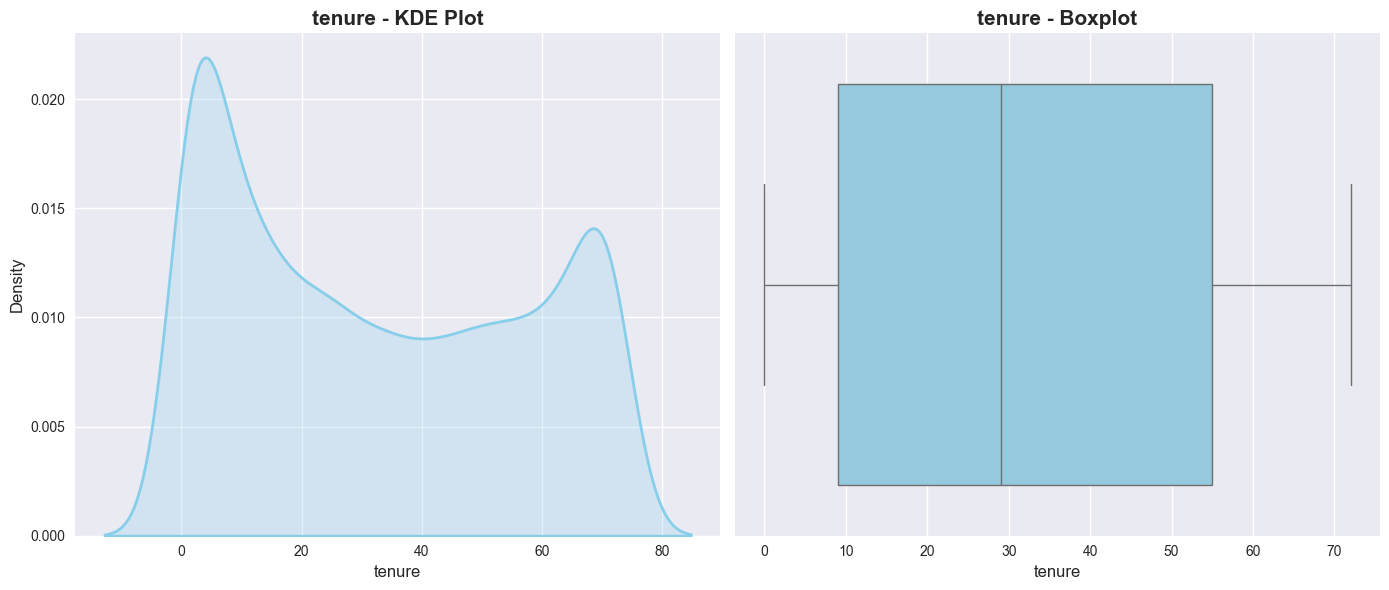

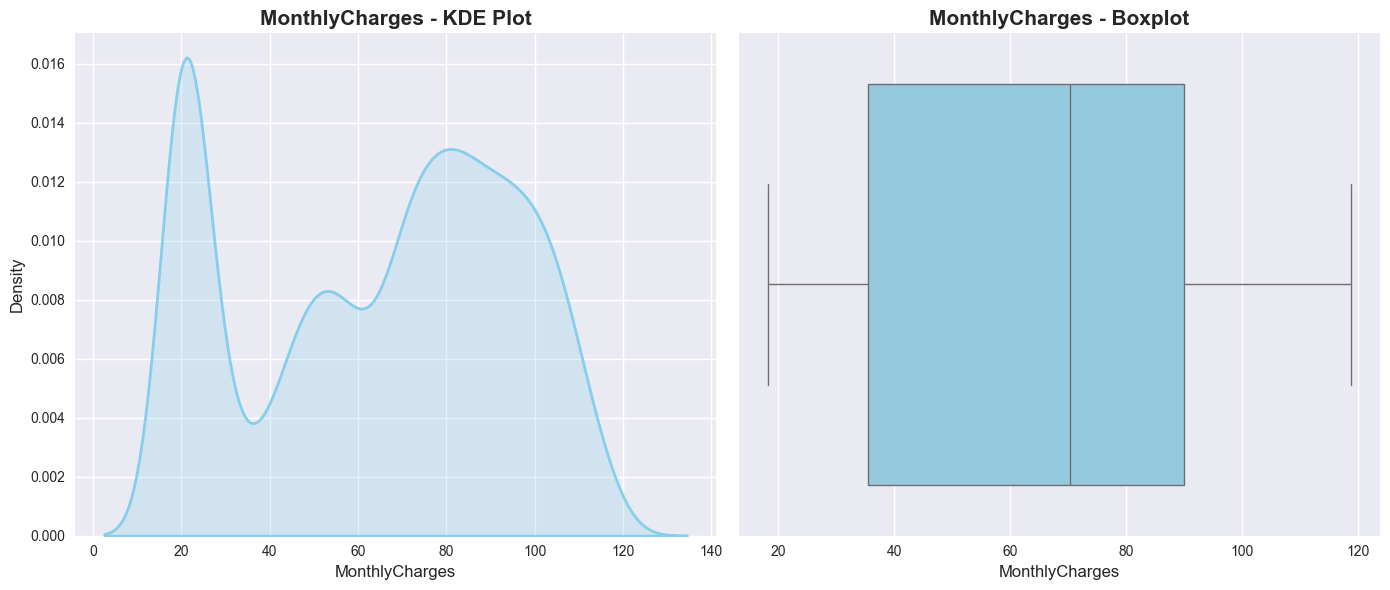

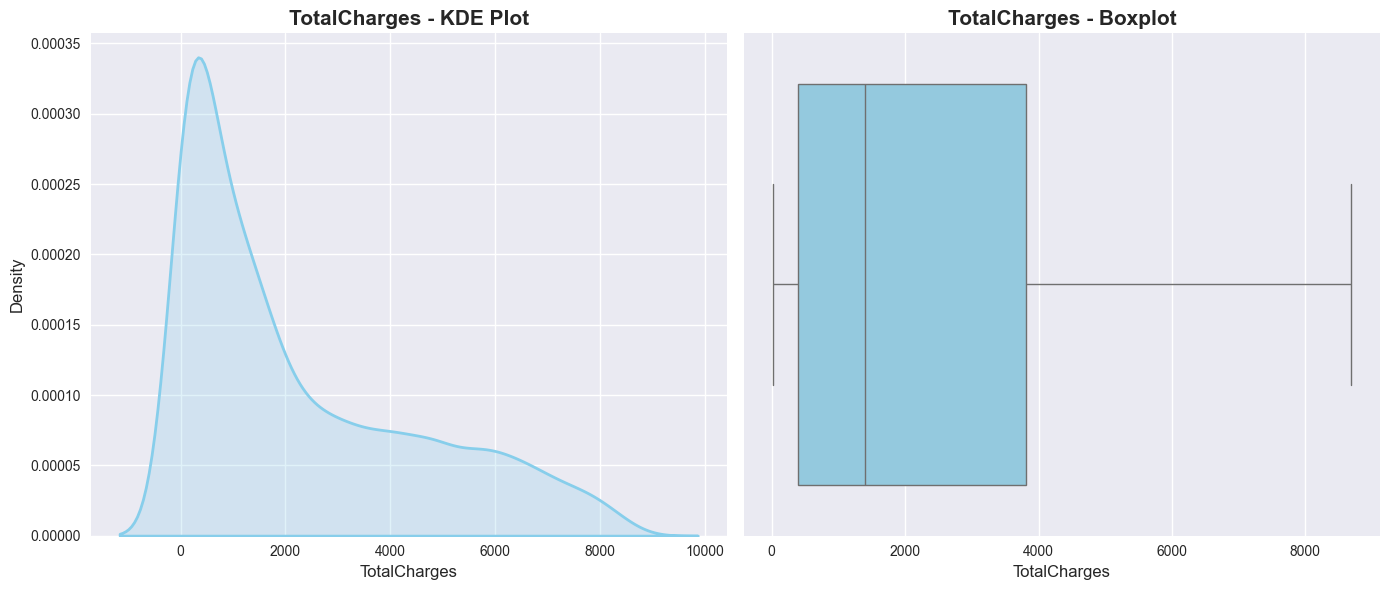

In [23]:
analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
for feature in num_features:
      analyzer.execute_analysis(train, feature)

<!-- -->


> #### **Insights from numerical features in univariate analysis :**
> - **`tenure :`**
>> - has a `bimodal distribution` suggests that there are two distinct groups or segments of customers based on the tenure: new customers with low tenure and long-term customers with higher tenure.

> - **`MonthlyCharges :`**  
>> - has a `multimodal distribution` suggests multiple customer groups paying different amounts for their plans.
> > - Each peak corresponds to a group of customers who are paying for a particular service plan.

> - **`TotalCharges :`** : 
>> - has a `right-skewed distribution` suggests that most customers have lower total charges, with a few customers having significantly higher charges.

> - **Good News which there are `no outliers`**


<!-- -->


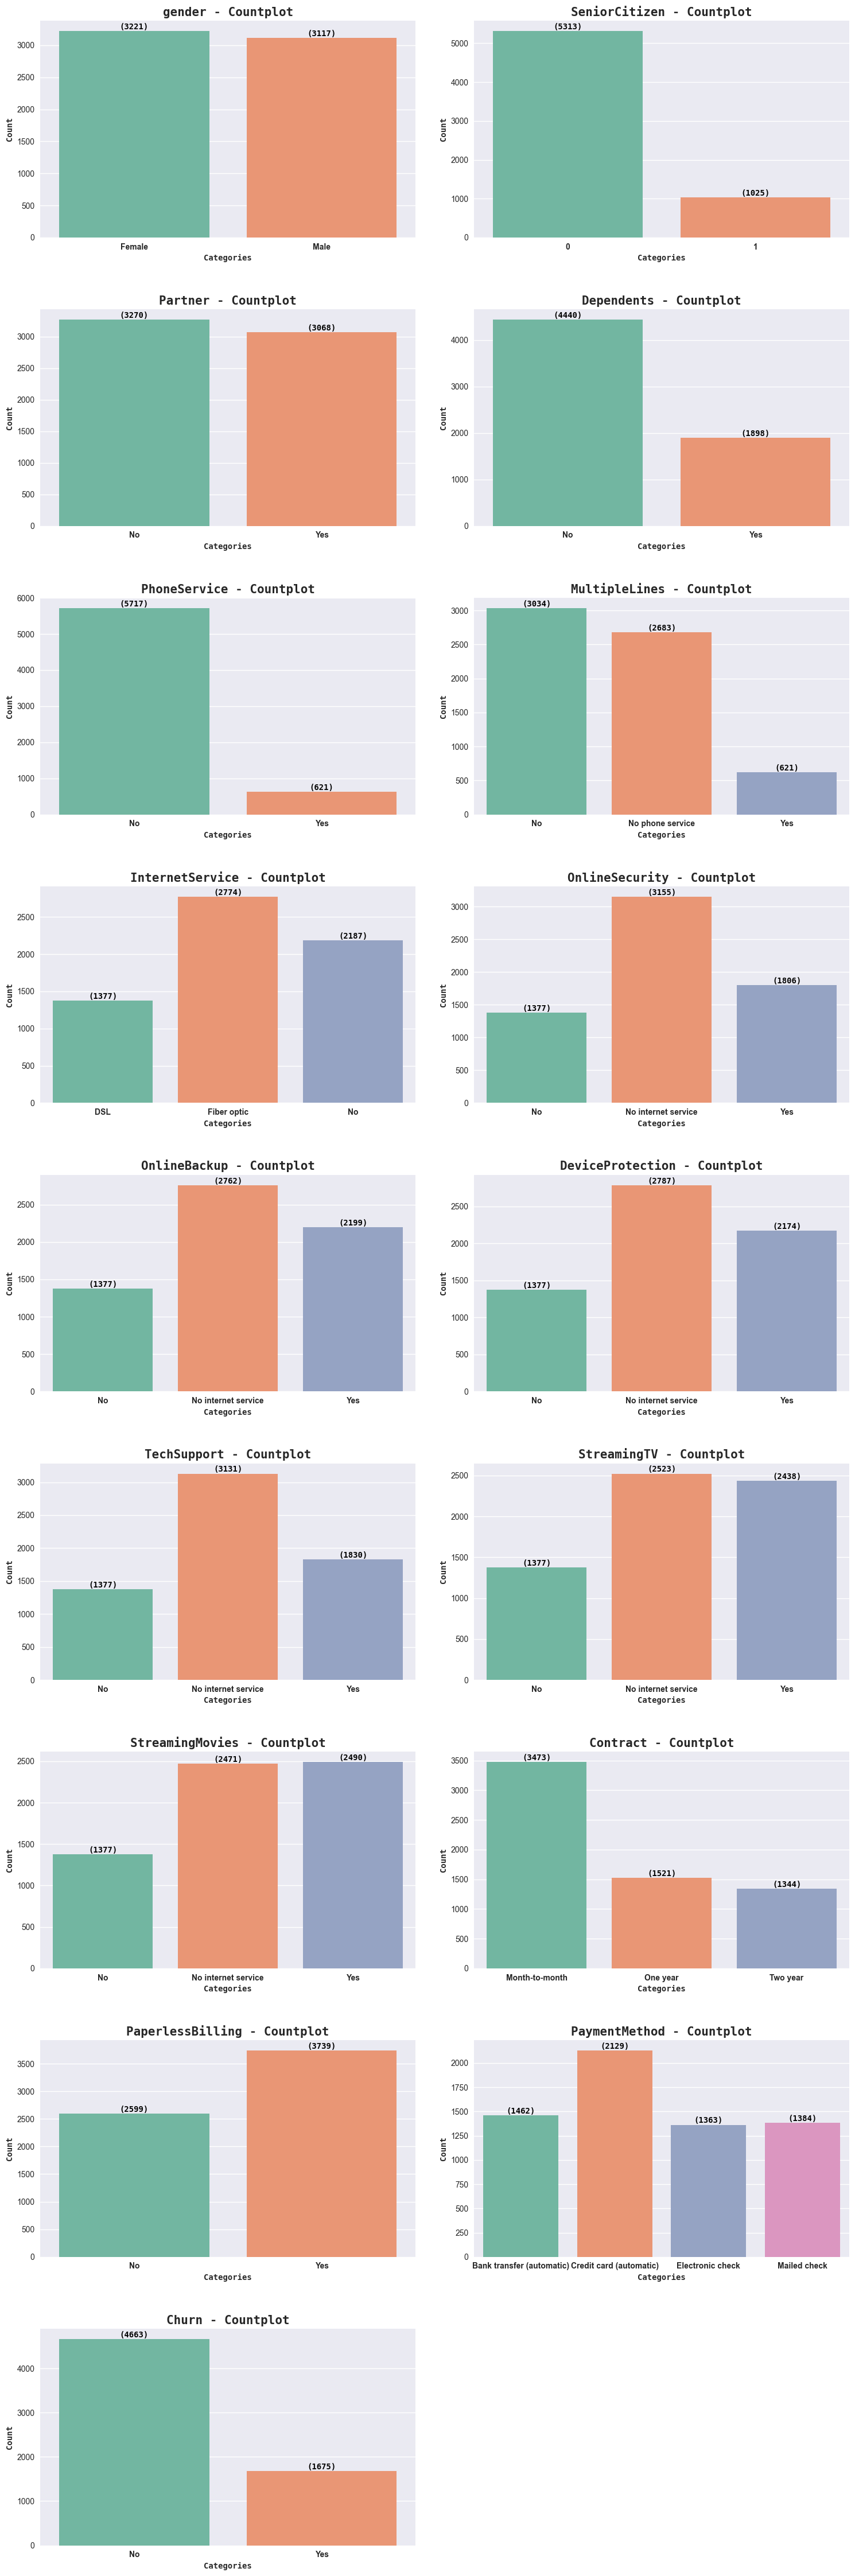

In [24]:
analyzer.set_strategy(CategoricalUnivariateAnalysis())
analyzer.execute_analysis(train, cat_features)

<!-- -->


> #### **Insights from categorical features in univariate analysis :**
> - **`Churn `**:
>> - indicates **`data imbalance`**, as **73.5%** of customers have **not churned**, while **26.5%** have churned.I will use methods to overcome this problem.

> - **`Demographic Info. `**:
>>   - **`gender and Partner`**: The distribution between customers  **almost equal distribution** 
> >  - **`SeniorCitizen`**: Most customers are **not** senior citizens.
> >  - **`Dependents`**: Most customers **do not** have dependents.

> - **`Services Info. `**:
>> - The **Majority** of people have (  PhoneService, do not have multiple lines, use Fiber optic internet service, do not have online security, do not have online backup, do not have device protection, do not have tech support, do not have streaming TVservice, do not have streaming movies service.)

> - **`Customer Account Info. `**:
>  > - **`Contract`**: The **Majority** of people have contract type  **Month-to-month**.
>  > - **`PaperlessBilling`**: Most customers use **PaperlessBilling**.
>  > - **`PaymentMethod`**: The most common payment method is **Electronic check**.



<!-- -->


### **Now Let's Explore More With The Bivariate Analysis**

> - #### **Feaures Analysis `By Target`**:

In [25]:
from eda.bivariate_analysis import BivariateAnalyzer, BivariateTargetAnalysis

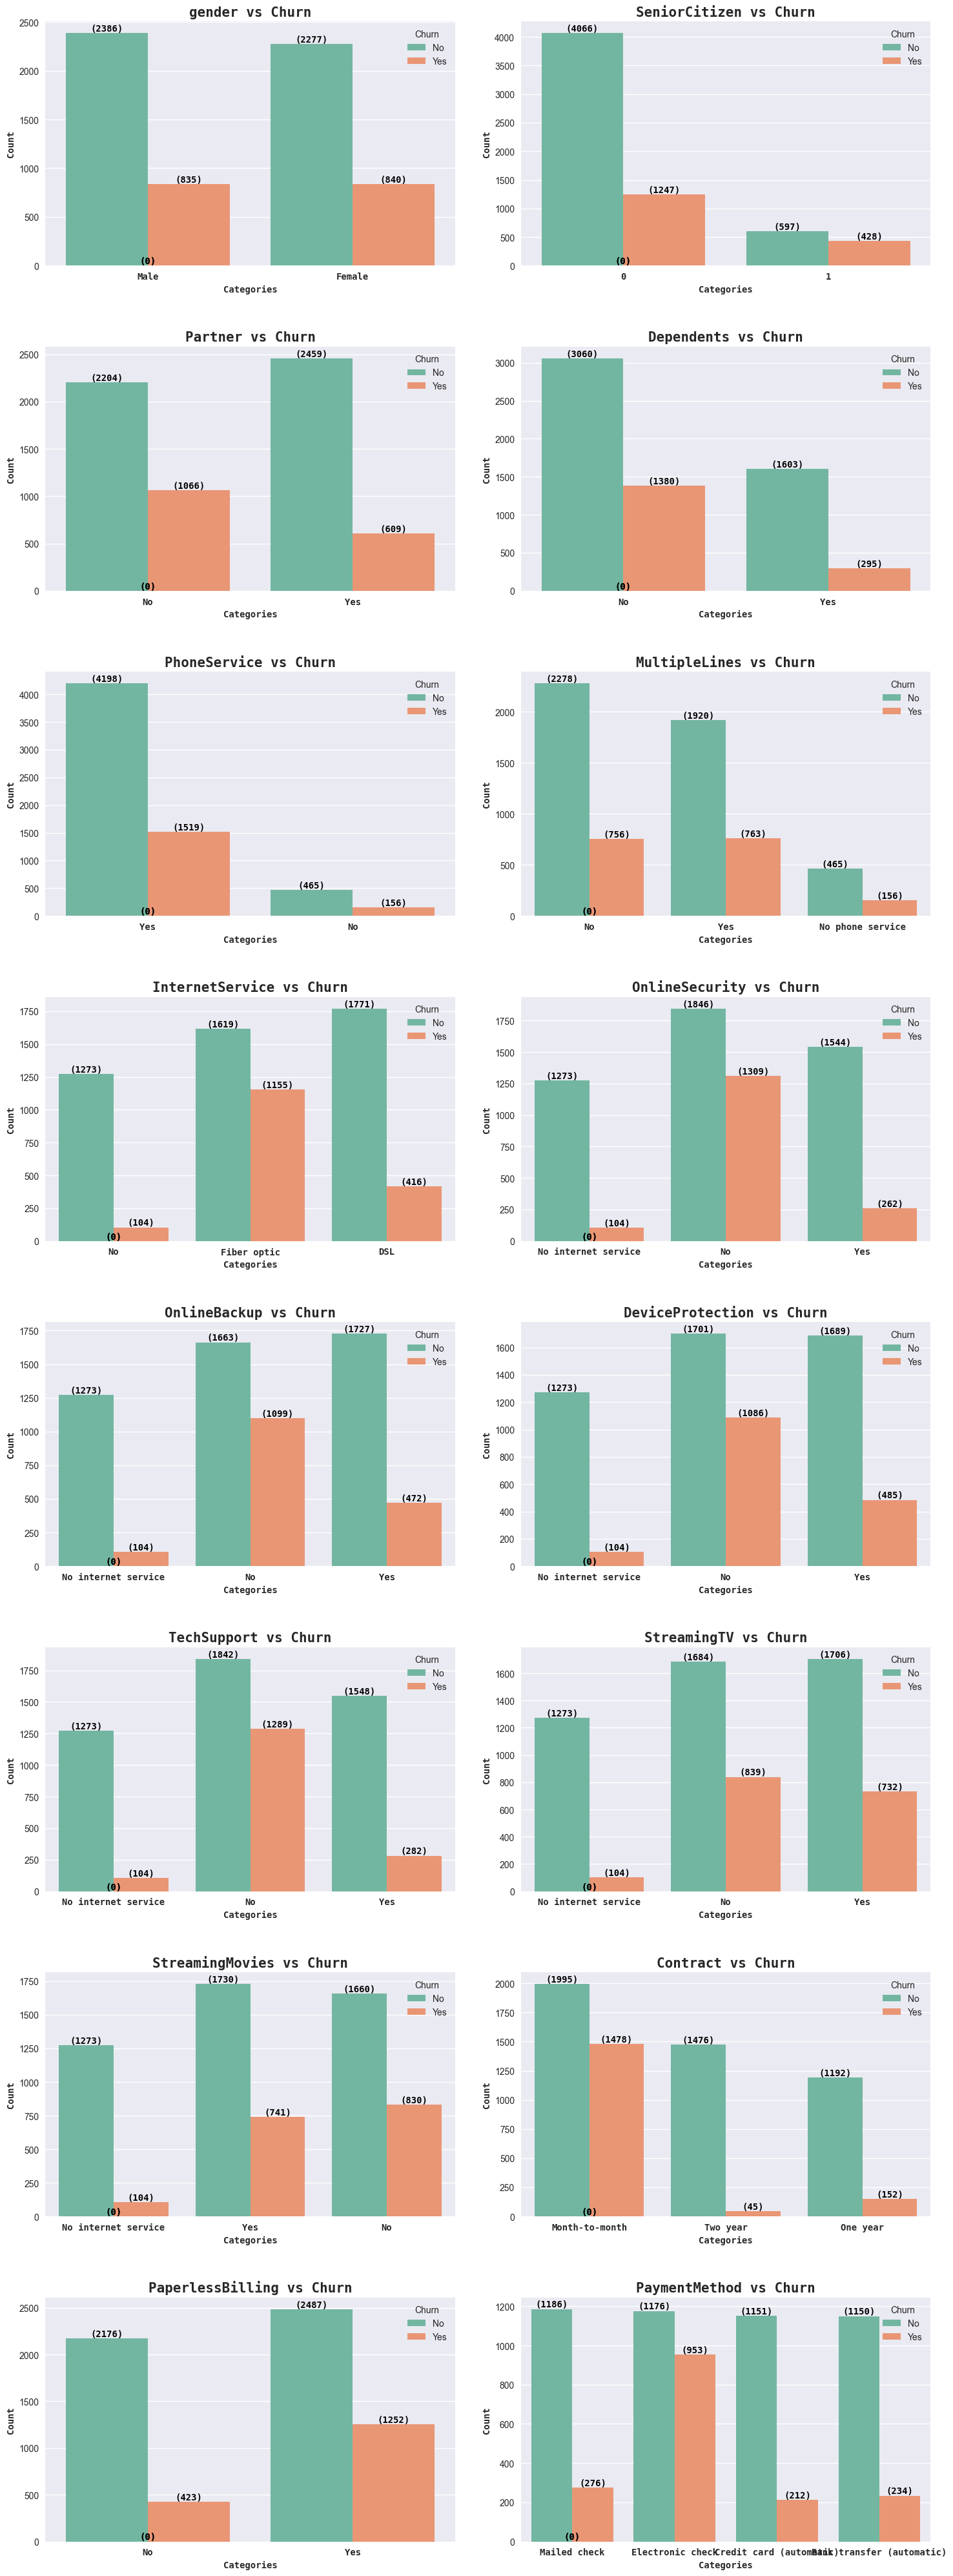

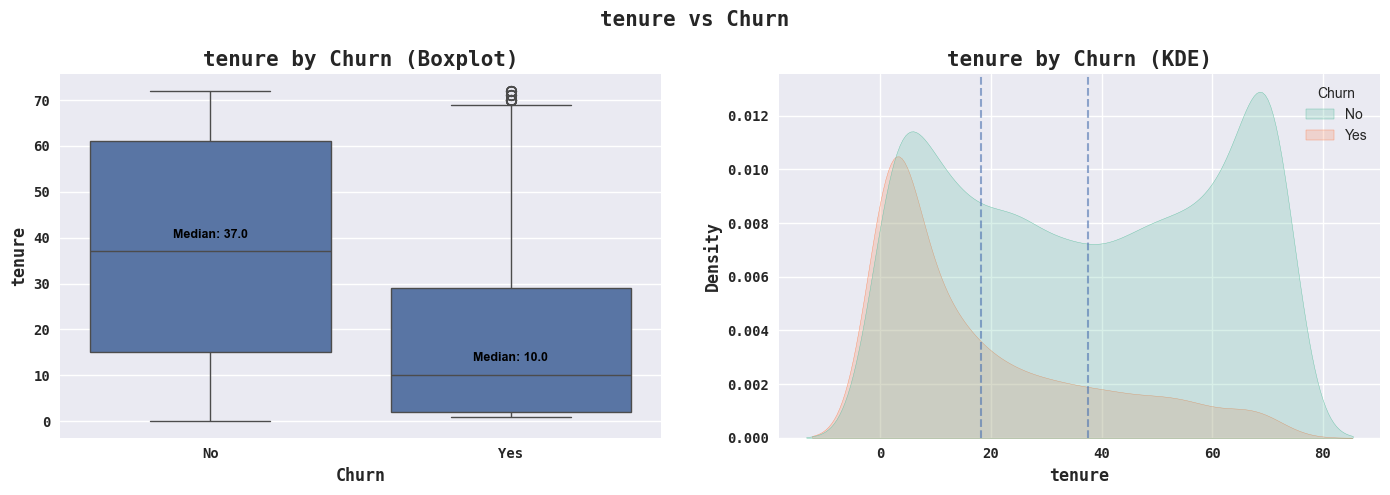

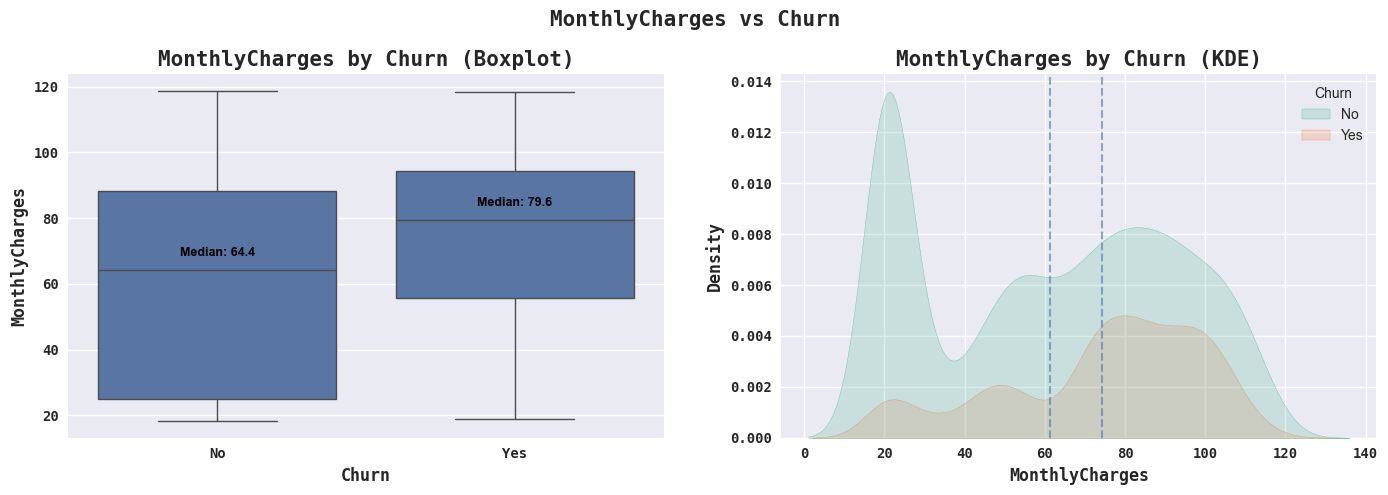

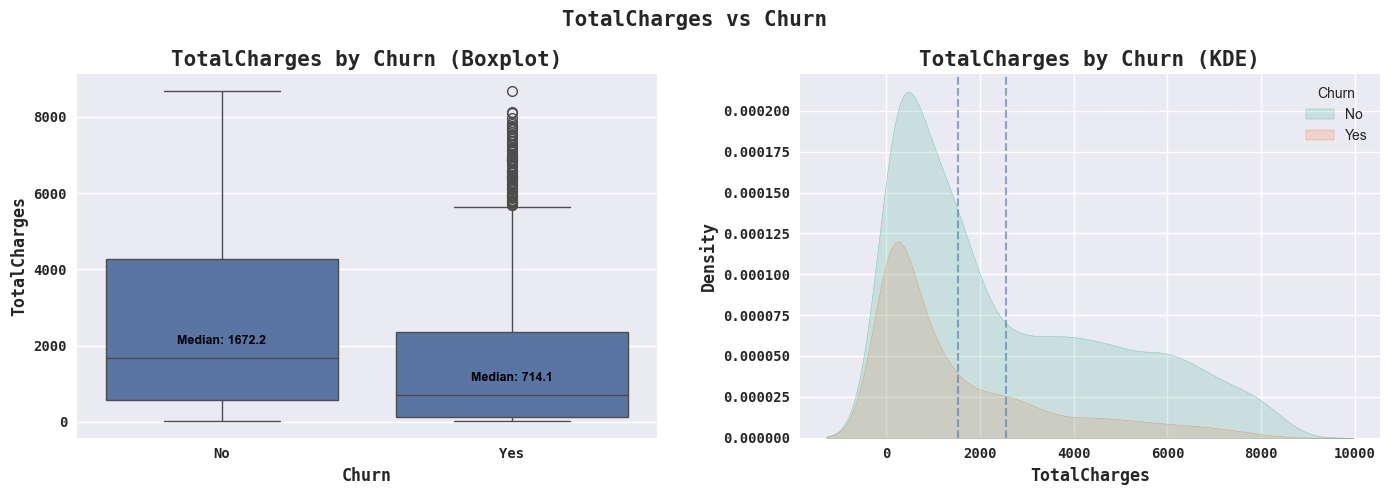

In [26]:
analyzer = BivariateAnalyzer(BivariateTargetAnalysis())
analyzer.execute_analysis(train, 'Churn')

<!-- -->



> #### **Features insights by churn :**
> - **`Billing & Payment Behavior`**:
>> - **`Paperless Billing`** users show higher **churn** rates.
>> - Customers using **`Electronic Checks`** churn the most compared to other payment methods.

> - **`Contract Type`**:
>> - Customers with **`Month-to-Month contracts`** are much more likely to **churn** than those on long-term contracts.

> - **`Demographics`**:
>> - Younger customers (**non-senior citizens**) are more likely to stay.
>> - **`Senior citizens`** show higher **churn** tendencies.

> - **`Services Subscribed`**:
>> - Customers who don’t **`use extra services`** like:
>>>- OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport are more likely to churn.
>> - **`Fiber Optic`** users have a higher churn rate, possibly due to cost or service quality concerns.

> - **`Tenure`**:
>> - Customers with **`lower tenure (new customers)`** tend to **churn** more.
>> - **`Long-term customers`** are more loyal.

